In [44]:
%matplotlib inline
import sys
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arff

from sklearn import tree
from sklearn import linear_model
from sklearn.externals.six import StringIO  
from IPython.core.display import Image

import pydot

# Load the Data

In [45]:
%%time
gender = {'Male' : 0, 'Female' : 1, 'Unknown' : 2}
language = {'English' : 0, 'EnglishandAnother' : 1, 'Another' : 2}

trainfile = 'sample_data\\test05.arff'

examples = []
features = []
labels = []

with open(trainfile, 'rb') as af:
    arffFile = arff.load(af)
    # do not include college gpa and college credits
    features = [arffFile['attributes'][0:-3][i][0].encode("ascii") for i in range(len(arffFile['attributes'][0:-3]))]
    data = arffFile['data']
    a = features
    print a
    for row in data:
        row[0] = gender[row[0]] # index of gender
        row[12] = language[row[12]] # index of language
        examples.append(row[0:-3]) # do not include number of credits taken first year
        labels.append(row[-1])

print 'Number of examples:', len(examples)

['gender', 'Firgen', 'famincome', 'SATCRDG', 'SATMATH', 'SATWRTG', 'SATTotal', 'HSGPA', 'ACTRead', 'ACTMath', 'ACTEngWrit', 'APIScore', 'FirstLang', 'HSGPAunweighted']
Number of examples: 2801
Wall time: 158 ms


In [46]:
%%time
# split examples on SAT and ACT
examplesSAT = []
examplesACT = []
featuresSAT = features[0:8]
featuresSAT.extend(features[11:])
featuresACT = features[0:3]
featuresACT.extend(features[7:])
for x in examples:
    sat = x[0:8]
    sat.extend(x[11:])
    examplesSAT.append(sat)
    act = x[0:3]
    act.extend(x[7:])
    examplesACT.append(act)

print featuresSAT, featuresACT

['gender', 'Firgen', 'famincome', 'SATCRDG', 'SATMATH', 'SATWRTG', 'SATTotal', 'HSGPA', 'APIScore', 'FirstLang', 'HSGPAunweighted'] ['gender', 'Firgen', 'famincome', 'HSGPA', 'ACTRead', 'ACTMath', 'ACTEngWrit', 'APIScore', 'FirstLang', 'HSGPAunweighted']
Wall time: 15 ms


# Fit Decision Tree

In [47]:
%%time
satTree = tree.DecisionTreeClassifier()
satTree = satTree.fit(examplesSAT, labels)
print dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')
Wall time: 32 ms


In [48]:
%%time
actTree = tree.DecisionTreeClassifier()
actTree = actTree.fit(examplesACT, labels)
print dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')
Wall time: 16 ms


In [49]:
%%time
dot_data = StringIO()
tree.export_graphviz(satTree, out_file=dot_data, feature_names=featuresSAT) 
#tree.export_graphviz(dt, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
treepng = graph.create_png()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.297977 to fit

Wall time: 20.3 s


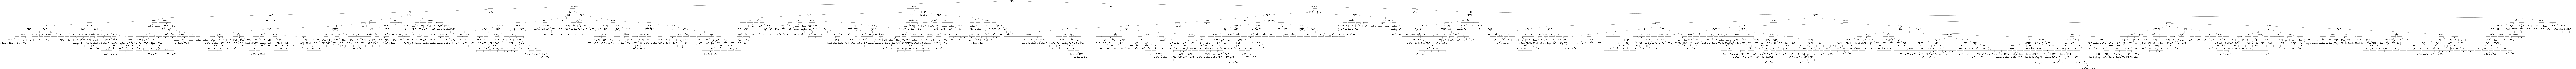

In [50]:
# SAT Tree
Image(treepng)

In [51]:
%%time
with open('tree_SAT.png', 'wb') as f:
    f.write(treepng)

Wall time: 184 ms


In [52]:
%%time
dot_data = StringIO()
tree.export_graphviz(actTree, out_file=dot_data, feature_names=featuresACT) 
#tree.export_graphviz(dt, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
treepng = graph.create_png()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.693687 to fit

Wall time: 11.6 s


In [53]:
# SAT Tree
Image(treepng)

In [54]:
%%time
with open('tree_ACT.png', 'wb') as f:
    f.write(treepng)

Wall time: 48 ms
